In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Connect to gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Persiapan proses data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/GEMASTIK/dataset.csv')
df

,tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_x,ddd_x,ff_avg
0,01-01-2014,22.0,31.6,28.3,77.0,0.6,3.0,140.0,1.0
1,02-01-2014,22.0,30.2,26.6,85.0,8888.0,3.0,300.0,1.0
2,03-01-2014,23.0,30.8,26.7,86.0,8.1,4.0,310.0,1.0
3,04-01-2014,22.0,31.2,NaN,NaN,8888.0,3.0,310.0,1.0
4,05-01-2014,23.0,30.9,27.4,85.0,2.4,4.0,320.0,1.0
...,...,...,...,...,...,...,...,...,...
3253,26-09-2019,21.0,34.9,29.2,54.0,0.0,5.0,310.0,2.0
3254,27-09-2019,21.0,34.0,25.7,76.0,0.0,5.0,300.0,2.0
3255,28-09-2019,21.0,34.5,27.2,73.0,0.0,4.0,40.0,2.0
3256,29-09-2019,23.0,34.0,26.7,78.0,3.5,6.0,160.0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tanggal  3258 non-null   object 
 1   Tn       3014 non-null   float64
 2   Tx       3022 non-null   float64
 3   Tavg     2998 non-null   float64
 4   RH_avg   2998 non-null   float64
 5   RR       2729 non-null   float64
 6   ff_x     3157 non-null   float64
 7   ddd_x    3157 non-null   float64
 8   ff_avg   3157 non-null   float64
dtypes: float64(8), object(1)
memory usage: 229.2+ KB


In [5]:
df.isnull().sum()

,0
tanggal,0
Tn,244
Tx,236
Tavg,260
RH_avg,260
RR,529
ff_x,101
ddd_x,101
ff_avg,101


In [6]:
df.rename(columns={"Tanggal": "tanggal"}, inplace=True)


In [7]:
# Mengubah format penanggalan menjadi <datetime64[ns]>
df['tanggal'] = [tgl.replace("-", "/") for tgl in df['tanggal']]
df.head(20)

,tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_x,ddd_x,ff_avg
0,01/01/2014,22.0,31.6,28.3,77.0,0.6,3.0,140.0,1.0
1,02/01/2014,22.0,30.2,26.6,85.0,8888.0,3.0,300.0,1.0
2,03/01/2014,23.0,30.8,26.7,86.0,8.1,4.0,310.0,1.0
3,04/01/2014,22.0,31.2,NaN,NaN,8888.0,3.0,310.0,1.0
4,05/01/2014,23.0,30.9,27.4,85.0,2.4,4.0,320.0,1.0
5,06/01/2014,23.0,30.6,27.0,82.0,NaN,3.0,320.0,1.0
6,07/01/2014,23.0,30.2,24.7,92.0,5.8,4.0,360.0,1.0
7,08/01/2014,NaN,NaN,25.8,85.0,43.1,3.0,240.0,2.0
8,09/01/2014,22.0,NaN,NaN,NaN,64.0,4.0,130.0,2.0
9,10/01/2014,23.0,29.2,25.4,85.0,78.2,2.0,240.0,1.0


In [8]:
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  3258 non-null   datetime64[ns]
 1   Tn       3014 non-null   float64       
 2   Tx       3022 non-null   float64       
 3   Tavg     2998 non-null   float64       
 4   RH_avg   2998 non-null   float64       
 5   RR       2729 non-null   float64       
 6   ff_x     3157 non-null   float64       
 7   ddd_x    3157 non-null   float64       
 8   ff_avg   3157 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 229.2 KB


In [9]:
# Menghapus data sebelum tahun 2016
df = df.loc[df['tanggal'].dt.year >= 2016]

In [10]:
# Mengurutkan DataFrame berdasarkan kolom 'tanggal' dalam urutan menaik
df = df.sort_values(by='tanggal')
# Menampilkan DataFrame yang telah diurutkan
df

,tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_x,ddd_x,ff_avg
2277,2016-01-01,22.0,31.6,27.4,77.0,2.4,4.0,30.0,2.0
2278,2016-01-02,24.0,30.8,27.4,81.0,1.0,5.0,40.0,2.0
2279,2016-01-03,24.0,30.4,27.5,83.0,NaN,6.0,360.0,2.0
2280,2016-01-04,24.0,32.2,26.9,86.0,0.9,4.0,350.0,2.0
2281,2016-01-05,23.0,31.4,26.6,83.0,NaN,6.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...
1466,2023-12-27,23.4,32.7,27.5,85.0,0.0,3.0,320.0,1.0
1467,2023-12-28,23.3,32.8,27.8,82.0,0.0,3.0,340.0,1.0
1468,2023-12-29,22.9,32.3,26.2,89.0,0.0,2.0,30.0,1.0
1469,2023-12-30,22.5,33.0,27.4,86.0,3.0,3.0,350.0,1.0


In [11]:
columns_to_replace = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ff_x', 'ddd_x', 'ff_avg']
df[columns_to_replace] = df[columns_to_replace].replace([8888, 9999], np.nan)

In [12]:
nan_data = df[df.isna().any(axis=1)]
nan_data

,tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_x,ddd_x,ff_avg
2279,2016-01-03,24.0,30.4,27.5,83.0,NaN,6.0,360.0,2.0
2281,2016-01-05,23.0,31.4,26.6,83.0,NaN,6.0,40.0,2.0
2282,2016-01-06,23.0,31.5,25.7,88.0,NaN,4.0,160.0,1.0
2284,2016-01-08,22.0,32.0,27.1,78.0,NaN,4.0,360.0,2.0
2285,2016-01-09,22.0,32.3,27.8,72.0,NaN,4.0,330.0,2.0
...,...,...,...,...,...,...,...,...,...
1366,2023-09-18,24.2,31.7,28.4,70.0,NaN,5.0,180.0,2.0
1369,2023-09-21,22.4,33.7,NaN,NaN,0.0,7.0,130.0,4.0
1398,2023-10-20,22.3,33.8,27.5,81.0,NaN,4.0,310.0,1.0
1401,2023-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Fill NaN values with the mean of each column
df[columns_to_replace] = df[columns_to_replace].fillna(df[columns_to_replace].mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2789 entries, 2277 to 1470
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  2789 non-null   datetime64[ns]
 1   Tn       2789 non-null   float64       
 2   Tx       2789 non-null   float64       
 3   Tavg     2789 non-null   float64       
 4   RH_avg   2789 non-null   float64       
 5   RR       2789 non-null   float64       
 6   ff_x     2789 non-null   float64       
 7   ddd_x    2789 non-null   float64       
 8   ff_avg   2789 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 217.9 KB


In [15]:
# Menghapus data terduplikat
df = df.drop_duplicates()
df

,tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_x,ddd_x,ff_avg
2277,2016-01-01,22.0,31.6,27.4,77.0,2.400000,4.0,30.0,2.0
2278,2016-01-02,24.0,30.8,27.4,81.0,1.000000,5.0,40.0,2.0
2279,2016-01-03,24.0,30.4,27.5,83.0,11.003944,6.0,360.0,2.0
2280,2016-01-04,24.0,32.2,26.9,86.0,0.900000,4.0,350.0,2.0
2281,2016-01-05,23.0,31.4,26.6,83.0,11.003944,6.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...
1466,2023-12-27,23.4,32.7,27.5,85.0,0.000000,3.0,320.0,1.0
1467,2023-12-28,23.3,32.8,27.8,82.0,0.000000,3.0,340.0,1.0
1468,2023-12-29,22.9,32.3,26.2,89.0,0.000000,2.0,30.0,1.0
1469,2023-12-30,22.5,33.0,27.4,86.0,3.000000,3.0,350.0,1.0


In [16]:
 df.isna().sum()

,0
tanggal,0
Tn,0
Tx,0
Tavg,0
RH_avg,0
RR,0
ff_x,0
ddd_x,0
ff_avg,0


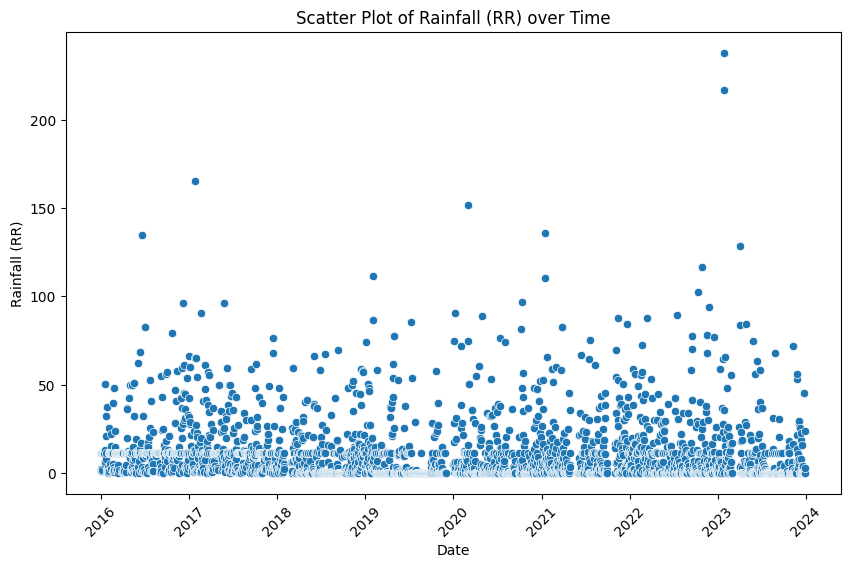

In [17]:
# Menampilkan scatter plot dari data RR dan tanggal curah hujan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tanggal', y='RR', data=df)
plt.title('Scatter Plot of Rainfall (RR) over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (RR)')
plt.xticks(rotation=45)
plt.show()

# Tahap 2 (Curah Hujan)



In [18]:
df2 = df[["tanggal", "RR"]]
df2

,tanggal,RR
2277,2016-01-01,2.400000
2278,2016-01-02,1.000000
2279,2016-01-03,11.003944
2280,2016-01-04,0.900000
2281,2016-01-05,11.003944
...,...,...
1466,2023-12-27,0.000000
1467,2023-12-28,0.000000
1468,2023-12-29,0.000000
1469,2023-12-30,3.000000


In [19]:
# Mengurutkan index pada dataset binders
df2["tanggal"].min(), df2["tanggal"].max()

# Setting index
df2 = df2.groupby("tanggal")["RR"].sum().reset_index()
df2

,tanggal,RR
0,2016-01-01,2.400000
1,2016-01-02,1.000000
2,2016-01-03,11.003944
3,2016-01-04,0.900000
4,2016-01-05,11.003944
...,...,...
2753,2023-12-27,0.000000
2754,2023-12-28,0.000000
2755,2023-12-29,0.000000
2756,2023-12-30,3.000000


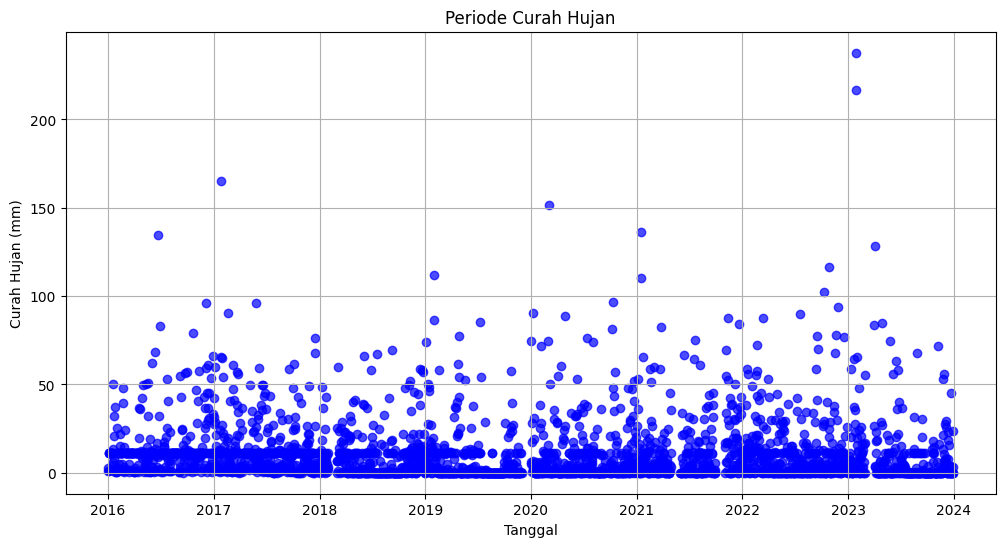

In [20]:
# Prepare data for visualization
df2 = df[["tanggal", "RR"]]
df2 = df2.groupby("tanggal")["RR"].sum().reset_index()
df2 = df2.set_index("tanggal")

# Scatter plot visualization
plt.figure(figsize=(12, 6))
plt.scatter(df2.index, df2["RR"], marker='o', color='b', alpha=0.7)
plt.title("Periode Curah Hujan")
plt.xlabel("Tanggal")
plt.ylabel("Curah Hujan (mm)")
plt.grid(True)
plt.show()


membuat data jadi perbulan

In [21]:
# Grup data berdasarkan tahun dan bulan, lalu hitung rata-rata tiap kolom selain RR
df_mean = df.groupby([df['tanggal'].dt.year.rename('Year'), df['tanggal'].dt.month.rename('Month')]).mean()

# Hitung jumlah RR per bulan
df_sum_rr = df.groupby([df['tanggal'].dt.year.rename('Year'), df['tanggal'].dt.month.rename('Month')])['RR'].sum()

# Gabungkan hasil rata-rata dengan total RR
df_per_bulan = df_mean.drop(columns=['RR']).join(df_sum_rr)

# Tambahkan kolom bulan dan tahun ke DataFrame
df_per_bulan = df_per_bulan.assign(Bulan=df_per_bulan.index.get_level_values('Month'))
df_per_bulan = df_per_bulan.assign(Tahun=df_per_bulan.index.get_level_values('Year'))

# Pindahkan kolom bulan dan tahun ke bagian depan DataFrame
new_order = ['Bulan', 'Tahun'] + [col for col in df_per_bulan.columns if col not in ['Bulan', 'Tahun']]
df_per_bulan = df_per_bulan.reindex(columns=new_order)

# Reset index untuk menghapus multi-index dan menampilkan rata-rata tiap kolom
df_per_bulan = df_per_bulan.reset_index(drop=True)

# Tampilkan DataFrame yang sudah diubah menjadi perbulan
print(df_per_bulan)

    Bulan  Tahun             tanggal         Tn         Tx       Tavg  \
0       1   2016 2016-01-16 00:00:00  22.938896  31.146506  26.657367   
1       2   2016 2016-02-15 00:00:00  22.724138  30.682759  26.625350   
2       3   2016 2016-03-16 00:00:00  23.066222  31.867742  27.328335   
3       4   2016 2016-04-15 12:00:00  23.233333  32.002780  27.813333   
4       5   2016 2016-05-16 00:00:00  23.488989  32.603226  27.658065   
..    ...    ...                 ...        ...        ...        ...   
87      8   2023 2023-08-16 00:00:00  22.729032  33.683871  28.451613   
88      9   2023 2023-09-15 12:00:00  22.326667  33.420000  27.909640   
89     10   2023 2023-10-16 00:00:00  22.140416  34.172313  28.625458   
90     11   2023 2023-11-15 12:00:00  23.423333  33.056667  27.460000   
91     12   2023 2023-12-16 00:00:00  23.416129  31.825806  27.129032   

       RH_avg      ff_x       ddd_x    ff_avg          RR  
0   82.131701  4.677419  160.967742  1.677419  329.451272  
1  

In [22]:
# Mengurangi jumlah angka di belakang koma
df_per_bulan = df_per_bulan.round(decimals=2)
df_per_bulan

,Bulan,Tahun,tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,RR
0,1,2016,2016-01-16 00:00:00,22.94,31.15,26.66,82.13,4.68,160.97,1.68,329.45
1,2,2016,2016-02-15 00:00:00,22.72,30.68,26.63,83.73,4.59,201.72,1.97,338.36
2,3,2016,2016-03-16 00:00:00,23.07,31.87,27.33,79.65,4.87,114.52,1.97,288.19
3,4,2016,2016-04-15 12:00:00,23.23,32.00,27.81,81.33,4.50,199.67,1.63,351.66
4,5,2016,2016-05-16 00:00:00,23.49,32.60,27.66,83.00,4.16,156.77,1.29,375.33
...,...,...,...,...,...,...,...,...,...,...,...
87,8,2023,2023-08-16 00:00:00,22.73,33.68,28.45,71.94,6.94,177.74,2.97,148.91
88,9,2023,2023-09-15 12:00:00,22.33,33.42,27.91,72.33,5.87,163.33,2.53,114.72
89,10,2023,2023-10-16 00:00:00,22.14,34.17,28.63,73.13,4.62,184.06,1.76,90.21
90,11,2023,2023-11-15 12:00:00,23.42,33.06,27.46,82.83,4.07,247.33,1.30,265.50


In [23]:
df = df_per_bulan

In [24]:
# Menyiapkan data untuk visualisasi
df2 = df[["tanggal", "RR"]]
df2

,tanggal,RR
0,2016-01-16 00:00:00,329.45
1,2016-02-15 00:00:00,338.36
2,2016-03-16 00:00:00,288.19
3,2016-04-15 12:00:00,351.66
4,2016-05-16 00:00:00,375.33
...,...,...
87,2023-08-16 00:00:00,148.91
88,2023-09-15 12:00:00,114.72
89,2023-10-16 00:00:00,90.21
90,2023-11-15 12:00:00,265.50


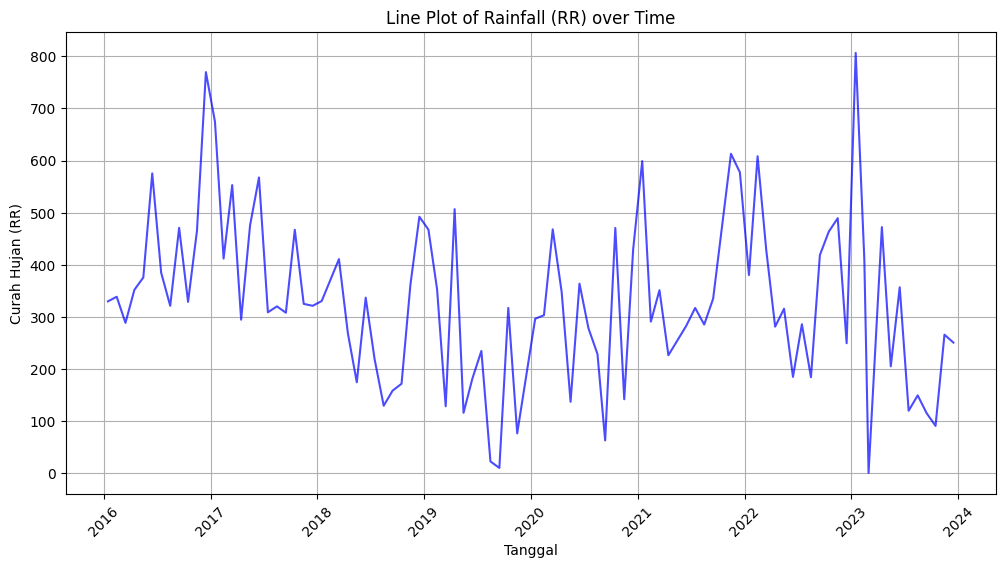

In [25]:
# Visualisasi hasil tahap 3 dengan line plot tanpa titik
plt.figure(figsize=(12, 6))
plt.plot(df2['tanggal'], df2['RR'], linestyle='-', color='b', alpha=0.7)
plt.title('Line Plot of Rainfall (RR) over Time')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (RR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# *Forecasting*

In [26]:
df = df2[["tanggal", "RR"]]
df

,tanggal,RR
0,2016-01-16 00:00:00,329.45
1,2016-02-15 00:00:00,338.36
2,2016-03-16 00:00:00,288.19
3,2016-04-15 12:00:00,351.66
4,2016-05-16 00:00:00,375.33
...,...,...
87,2023-08-16 00:00:00,148.91
88,2023-09-15 12:00:00,114.72
89,2023-10-16 00:00:00,90.21
90,2023-11-15 12:00:00,265.50


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import drive

In [28]:
# Stationarize the series
result = adfuller(df['RR'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.269015078353317
p-value: 0.01632160378563634


In [29]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [30]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [31]:
adfuller_test(df2['RR'])

ADF Test Statistic : -3.269015078353317
p-value : 0.01632160378563634
#Lags Used : 2
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

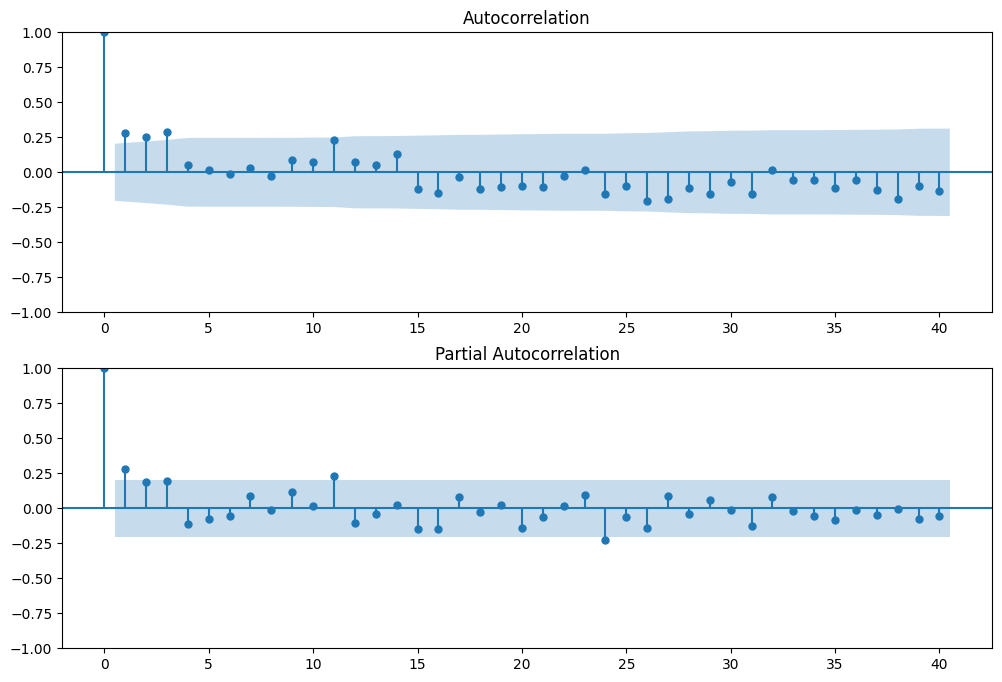

In [33]:
# Plot ACF and PACF charts to find optimal parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['RR'].dropna(), lags=40, ax=ax[0])
plot_pacf(df['RR'].dropna(), lags=40, ax=ax[1])
plt.show()

# Model 1

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
# Define the SARIMA model
# Here, p, d, q are determined from ACF and PACF charts
# P, D, Q, s are determined based on seasonality analysis
model = SARIMAX(df['RR'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

In [36]:
# Get the AIC value
aic = model_fit.aic
print(f'Akaike Information Criterion (AIC): {aic}')

Akaike Information Criterion (AIC): 1055.36049086934


In [37]:
# Make predictions for one year
forecast_steps = 24 # forecasting 24 month
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int(alpha=0.05)
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

In [38]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

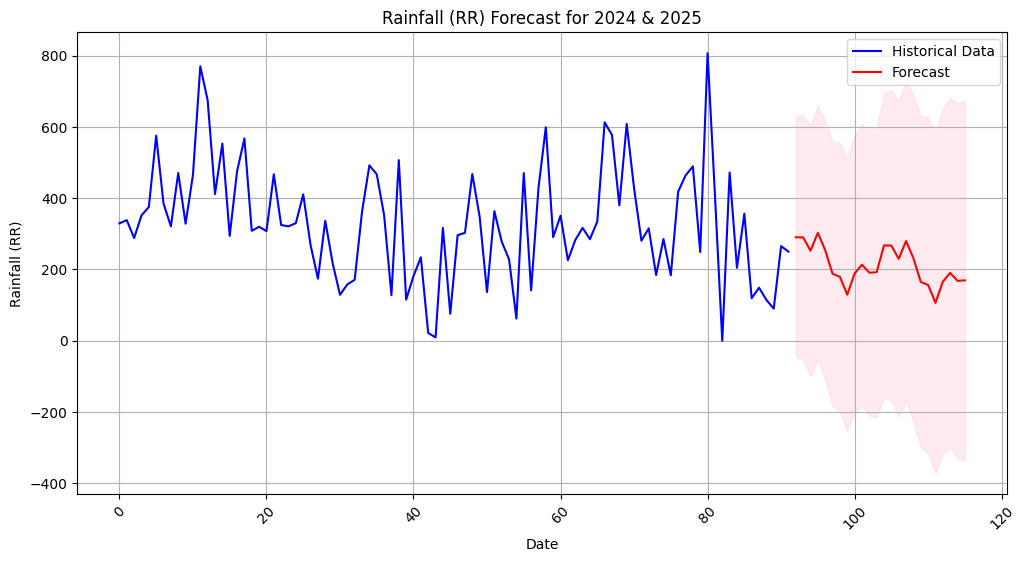

In [39]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RR'], label='Historical Data', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Rainfall (RR) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Rainfall (RR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [40]:
forecast_df

,lower RR,upper RR,Forecast
92,-46.420978,627.282250,290.430636
93,-53.898080,633.946655,290.024287
94,-98.142630,603.539106,252.698238
95,-54.794971,660.416085,302.810557
96,-109.256270,617.996699,254.370215
97,-182.121347,558.119794,187.999224
98,-197.065006,555.935846,179.435420
99,-253.346866,512.200958,129.427046
100,-200.295106,577.597337,188.651115
101,-181.575646,608.468562,213.446458


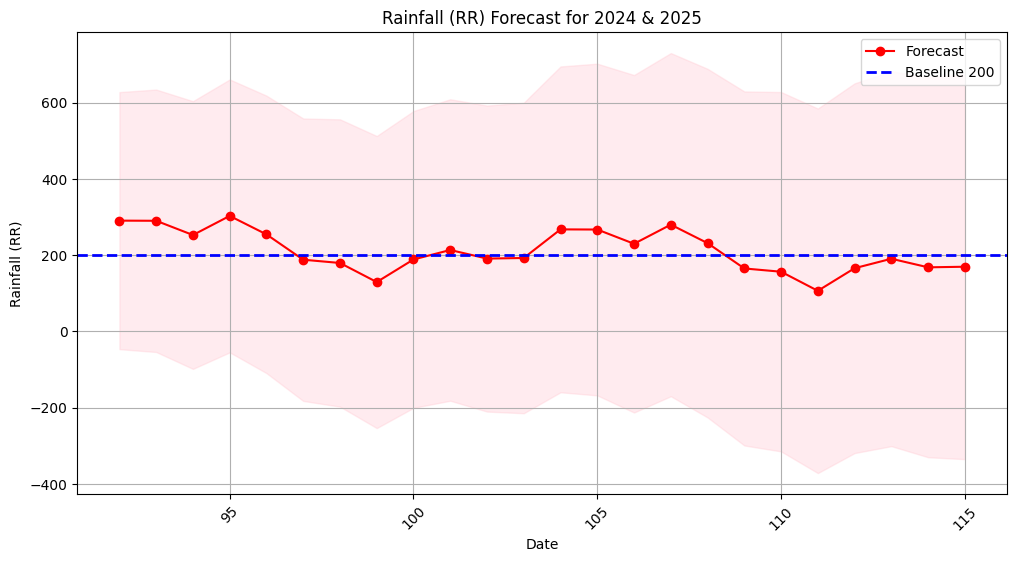

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot garis dengan titik-titik pada setiap titik
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r', marker='o')

# Mengisi area antara batas atas dan bawah prediksi
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)

# Menambahkan garis horizontal biru dengan nilai 200
plt.axhline(y=200, color='b', linestyle='--', linewidth=2, label='Baseline 200')
# Judul dan label sumbu
plt.title('Rainfall (RR) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Rainfall (RR)')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [42]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RR'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 186.63816401948537


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RR'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Ensure the indices of forecast_df match actual_data
forecast_df.index = actual_data.index

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE (Mean Absolute Percentage Error) manually
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

mape = mean_absolute_percentage_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 186.63816401948537
Mean Absolute Error (MAE): 141.4939479019337
Mean Absolute Percentage Error (MAPE): 994.8085249952422


In [44]:
# Menghitung standar deviasi dari kolom curah_hujan
std_dev = df['RR'].std()
std_dev

161.66668590242605

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best model parameters: {'gb__max_depth': 10, 'gb__n_estimators': 200, 'rf__max_depth': 10, 'rf__n_estimators': 200, 'svr__C': 10.0, 'svr__epsilon': 0.1}
Mean Squared Error (MSE): 12452.643677465067
Root Mean Squared Error (RMSE): 111.59141399527594


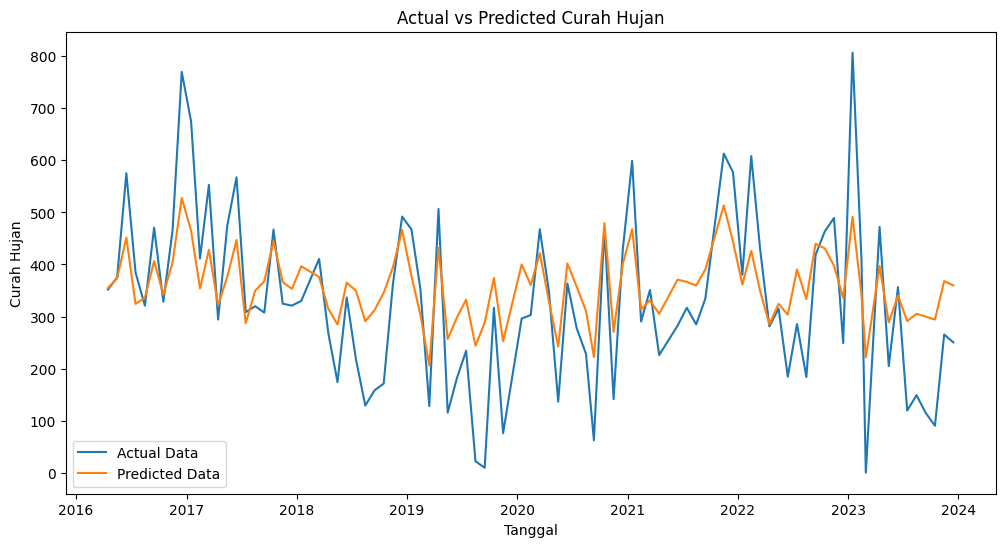

In [45]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

# Load data
# df = pd.read_csv('your_data.csv')  # Asumsikan df sudah tersedia dan kolom 'tanggal' sudah ada

# Feature Engineering
df['month'] = df['tanggal'].dt.month
df['day'] = df['tanggal'].dt.day

# Lagged Features
df['lag_1'] = df['RR'].shift(1)
df['lag_2'] = df['RR'].shift(2)
df['lag_3'] = df['RR'].shift(3)

# Drop NaN values generated by shifting
df = df.dropna()

# Tentukan fitur yang relevan, sesuaikan dengan data yang Anda miliki
X = df[['month', 'day', 'lag_1', 'lag_2', 'lag_3']]
y = df['RR']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1)),
    ('gb', GradientBoostingRegressor(n_estimators=200, max_depth=10)),
    ('svr', SVR(C=1.0, epsilon=0.2))
]

# Define Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'gb__n_estimators': [100, 200],
    'gb__max_depth': [10, 20],
    'svr__C': [1.0, 10.0],
    'svr__epsilon': [0.1, 0.2]
}

grid_search = GridSearchCV(stacking_model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Best model parameters: {grid_search.best_params_}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualisasi hasil prediksi vs data aktual
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['tanggal'], y, label='Actual Data')
plt.plot(df['tanggal'], y_pred, label='Predicted Data')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt.title('Actual vs Predicted Curah Hujan')
plt.legend()
plt.show()


# Model 2


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
# Define the SARIMA model
# Here, p, d, q are determined from ACF and PACF charts
# P, D, Q, s are determined based on seasonality analysis
model = SARIMAX(df['RR'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [48]:
# Get the AIC value
aic = model_fit.aic
print(f'Akaike Information Criterion (AIC): {aic}')

Akaike Information Criterion (AIC): 1019.6434679992328


In [49]:
# Make predictions for one year
forecast_steps = 24 # forecasting 24 month
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int(alpha=0.05)
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

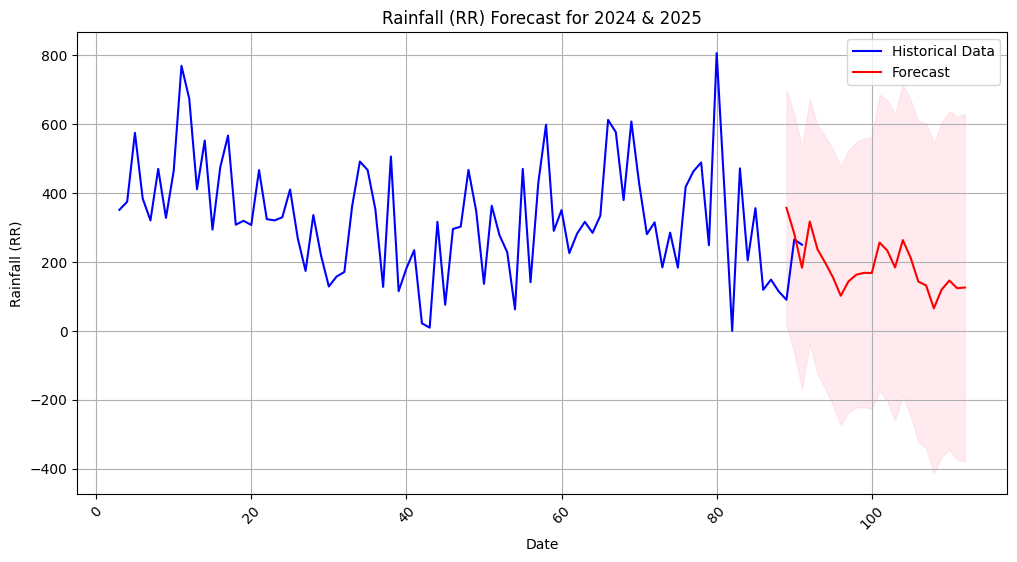

In [51]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RR'], label='Historical Data', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Rainfall (RR) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Rainfall (RR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [52]:
forecast_df

,lower RR,upper RR,Forecast
89,16.429462,698.184762,357.307112
90,-62.367389,628.007097,282.819854
91,-167.138472,533.960360,183.410944
92,-38.088857,673.518724,317.714933
93,-124.208412,597.756223,236.773906
94,-168.240909,563.934092,197.846591
95,-215.923040,526.253385,155.165172
96,-273.444791,477.677197,102.116203
97,-236.406364,524.454038,144.023837
98,-221.976768,548.487181,163.255207


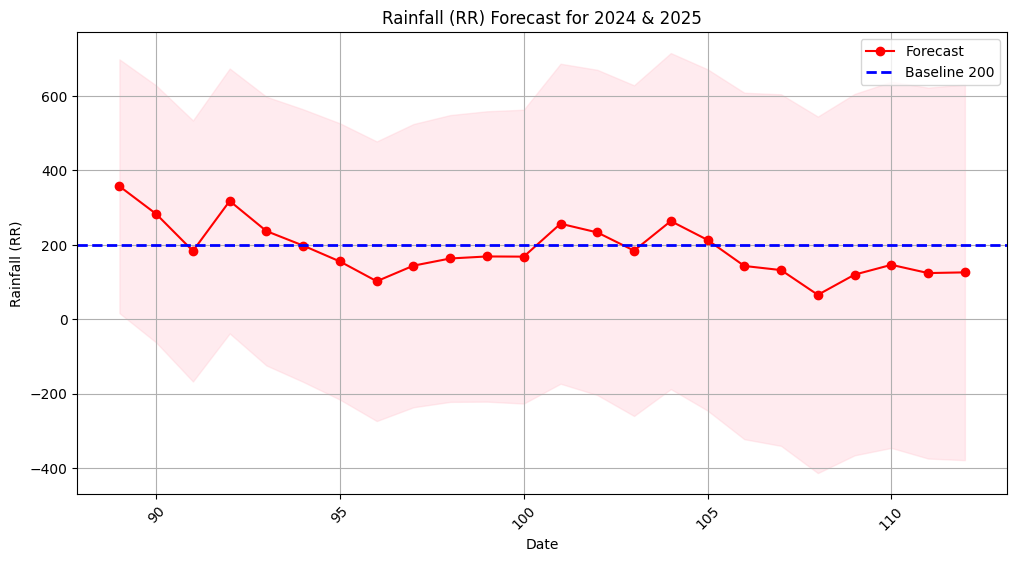

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot garis dengan titik-titik pada setiap titik
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r', marker='o')

# Mengisi area antara batas atas dan bawah prediksi
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)

# Menambahkan garis horizontal biru dengan nilai 200
plt.axhline(y=200, color='b', linestyle='--', linewidth=2, label='Baseline 200')
# Judul dan label sumbu
plt.title('Rainfall (RR) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Rainfall (RR)')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [54]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RR'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 201.54456319097216


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RR'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Ensure the indices of forecast_df match actual_data
forecast_df.index = actual_data.index

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE (Mean Absolute Percentage Error) manually
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

mape = mean_absolute_percentage_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 201.54456319097216
Mean Absolute Error (MAE): 153.06971313450143
Mean Absolute Percentage Error (MAPE): 806.935169616742


In [56]:
# Menghitung standar deviasi dari kolom curah_hujan
std_dev = df['RR'].std()
std_dev

164.33470158248159

# Tahap 3 (Kelembaban)

In [57]:
df_per_bulan

,Bulan,Tahun,tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,RR
0,1,2016,2016-01-16 00:00:00,22.94,31.15,26.66,82.13,4.68,160.97,1.68,329.45
1,2,2016,2016-02-15 00:00:00,22.72,30.68,26.63,83.73,4.59,201.72,1.97,338.36
2,3,2016,2016-03-16 00:00:00,23.07,31.87,27.33,79.65,4.87,114.52,1.97,288.19
3,4,2016,2016-04-15 12:00:00,23.23,32.00,27.81,81.33,4.50,199.67,1.63,351.66
4,5,2016,2016-05-16 00:00:00,23.49,32.60,27.66,83.00,4.16,156.77,1.29,375.33
...,...,...,...,...,...,...,...,...,...,...,...
87,8,2023,2023-08-16 00:00:00,22.73,33.68,28.45,71.94,6.94,177.74,2.97,148.91
88,9,2023,2023-09-15 12:00:00,22.33,33.42,27.91,72.33,5.87,163.33,2.53,114.72
89,10,2023,2023-10-16 00:00:00,22.14,34.17,28.63,73.13,4.62,184.06,1.76,90.21
90,11,2023,2023-11-15 12:00:00,23.42,33.06,27.46,82.83,4.07,247.33,1.30,265.50


In [58]:
df = df_per_bulan

In [59]:
df['RH_avg'] = df['RH_avg'].replace(8888, '')
df

,Bulan,Tahun,tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,RR
0,1,2016,2016-01-16 00:00:00,22.94,31.15,26.66,82.13,4.68,160.97,1.68,329.45
1,2,2016,2016-02-15 00:00:00,22.72,30.68,26.63,83.73,4.59,201.72,1.97,338.36
2,3,2016,2016-03-16 00:00:00,23.07,31.87,27.33,79.65,4.87,114.52,1.97,288.19
3,4,2016,2016-04-15 12:00:00,23.23,32.00,27.81,81.33,4.50,199.67,1.63,351.66
4,5,2016,2016-05-16 00:00:00,23.49,32.60,27.66,83.00,4.16,156.77,1.29,375.33
...,...,...,...,...,...,...,...,...,...,...,...
87,8,2023,2023-08-16 00:00:00,22.73,33.68,28.45,71.94,6.94,177.74,2.97,148.91
88,9,2023,2023-09-15 12:00:00,22.33,33.42,27.91,72.33,5.87,163.33,2.53,114.72
89,10,2023,2023-10-16 00:00:00,22.14,34.17,28.63,73.13,4.62,184.06,1.76,90.21
90,11,2023,2023-11-15 12:00:00,23.42,33.06,27.46,82.83,4.07,247.33,1.30,265.50


In [60]:
# Konversi ke tipe numerik
df['RH_avg'] = pd.to_numeric(df['RH_avg'], errors='coerce')

# Cari nilai rata-rata dari kolom RH_avg
avgRH_avg = df['RH_avg'].mean()

# Isi nilai kosong dengan nilai rata-rata
df['RH_avg'] = df['RH_avg'].fillna(avgRH_avg)
df

,Bulan,Tahun,tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,RR
0,1,2016,2016-01-16 00:00:00,22.94,31.15,26.66,82.13,4.68,160.97,1.68,329.45
1,2,2016,2016-02-15 00:00:00,22.72,30.68,26.63,83.73,4.59,201.72,1.97,338.36
2,3,2016,2016-03-16 00:00:00,23.07,31.87,27.33,79.65,4.87,114.52,1.97,288.19
3,4,2016,2016-04-15 12:00:00,23.23,32.00,27.81,81.33,4.50,199.67,1.63,351.66
4,5,2016,2016-05-16 00:00:00,23.49,32.60,27.66,83.00,4.16,156.77,1.29,375.33
...,...,...,...,...,...,...,...,...,...,...,...
87,8,2023,2023-08-16 00:00:00,22.73,33.68,28.45,71.94,6.94,177.74,2.97,148.91
88,9,2023,2023-09-15 12:00:00,22.33,33.42,27.91,72.33,5.87,163.33,2.53,114.72
89,10,2023,2023-10-16 00:00:00,22.14,34.17,28.63,73.13,4.62,184.06,1.76,90.21
90,11,2023,2023-11-15 12:00:00,23.42,33.06,27.46,82.83,4.07,247.33,1.30,265.50


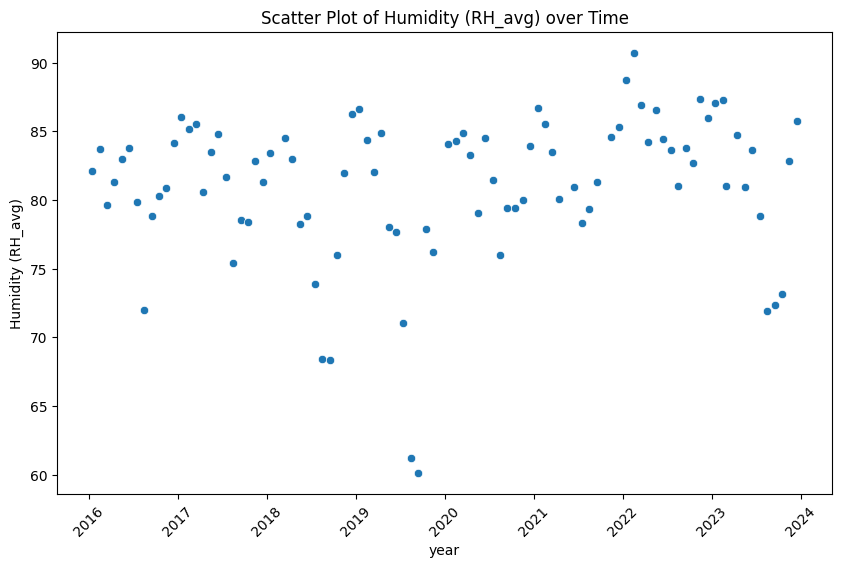

In [61]:
# Menampilkan scatter plot dari data RH_avg dan tanggal Kelembaban
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tanggal', y='RH_avg', data=df)
plt.title('Scatter Plot of Humidity (RH_avg) over Time')
plt.xlabel('year')
plt.ylabel('Humidity (RH_avg)')
plt.xticks(rotation=45)
plt.show()

In [62]:
df2 = df[["tanggal", "RH_avg"]]
df2

,tanggal,RH_avg
0,2016-01-16 00:00:00,82.13
1,2016-02-15 00:00:00,83.73
2,2016-03-16 00:00:00,79.65
3,2016-04-15 12:00:00,81.33
4,2016-05-16 00:00:00,83.00
...,...,...
87,2023-08-16 00:00:00,71.94
88,2023-09-15 12:00:00,72.33
89,2023-10-16 00:00:00,73.13
90,2023-11-15 12:00:00,82.83


In [63]:
# Mengurutkan index pada dataset binders
df2["tanggal"].min(), df2["tanggal"].max()

# Setting index
df2 = df2.groupby("tanggal")["RH_avg"].sum().reset_index()
df2

,tanggal,RH_avg
0,2016-01-16 00:00:00,82.13
1,2016-02-15 00:00:00,83.73
2,2016-03-16 00:00:00,79.65
3,2016-04-15 12:00:00,81.33
4,2016-05-16 00:00:00,83.00
...,...,...
87,2023-08-16 00:00:00,71.94
88,2023-09-15 12:00:00,72.33
89,2023-10-16 00:00:00,73.13
90,2023-11-15 12:00:00,82.83


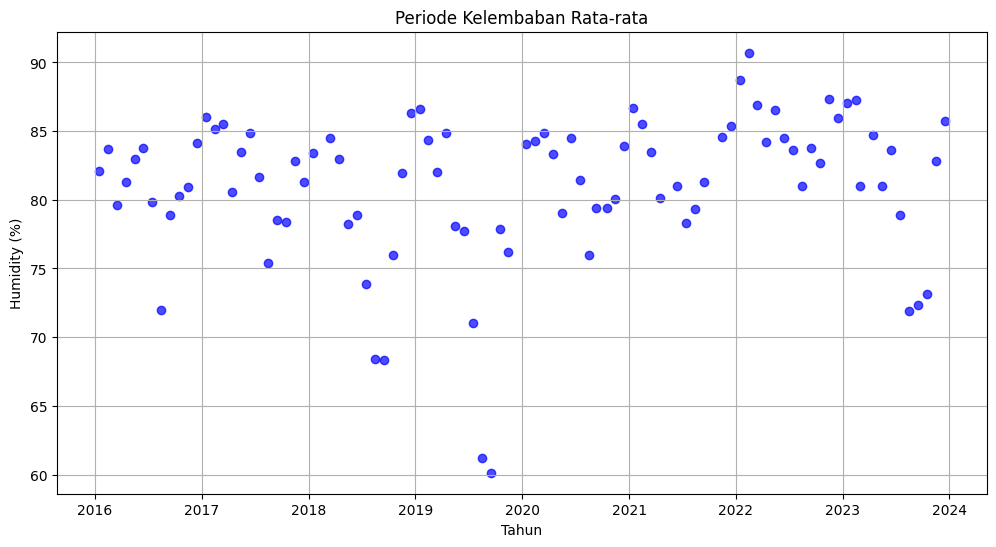

In [64]:
# Prepare data for visualization
df2 = df[["tanggal", "RH_avg"]]
df2 = df2.groupby("tanggal")["RH_avg"].sum().reset_index()
df2 = df2.set_index("tanggal")

# Scatter plot visualization
plt.figure(figsize=(12, 6))
plt.scatter(df2.index, df2["RH_avg"], marker='o', color='b', alpha=0.7)
plt.title("Periode Kelembaban Rata-rata")
plt.xlabel("Tahun")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()


In [65]:
# Menyiapkan data untuk visualisasi
df2 = df[["tanggal", "RH_avg"]]
df2

,tanggal,RH_avg
0,2016-01-16 00:00:00,82.13
1,2016-02-15 00:00:00,83.73
2,2016-03-16 00:00:00,79.65
3,2016-04-15 12:00:00,81.33
4,2016-05-16 00:00:00,83.00
...,...,...
87,2023-08-16 00:00:00,71.94
88,2023-09-15 12:00:00,72.33
89,2023-10-16 00:00:00,73.13
90,2023-11-15 12:00:00,82.83


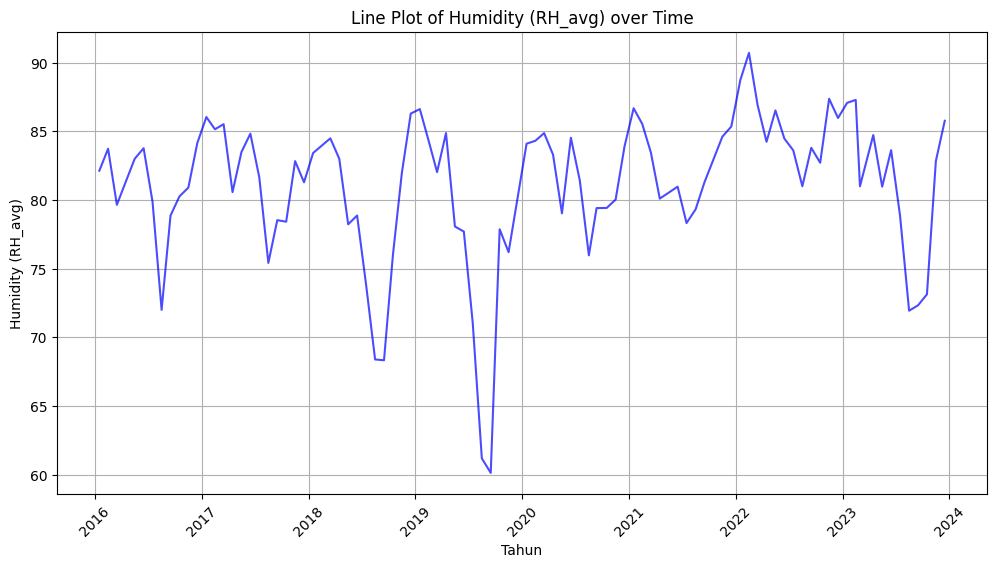

In [66]:
# Visualisasi hasil tahap 3 dengan line plot tanpa titik
plt.figure(figsize=(12, 6))
plt.plot(df2['tanggal'], df2['RH_avg'], linestyle='-', color='b', alpha=0.7)
plt.title('Line Plot of Humidity (RH_avg) over Time')
plt.xlabel('Tahun')
plt.ylabel('Humidity (RH_avg)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# *Forecasting*

In [67]:
df = df2[["tanggal", "RH_avg"]]
df

,tanggal,RH_avg
0,2016-01-16 00:00:00,82.13
1,2016-02-15 00:00:00,83.73
2,2016-03-16 00:00:00,79.65
3,2016-04-15 12:00:00,81.33
4,2016-05-16 00:00:00,83.00
...,...,...
87,2023-08-16 00:00:00,71.94
88,2023-09-15 12:00:00,72.33
89,2023-10-16 00:00:00,73.13
90,2023-11-15 12:00:00,82.83


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import drive

In [69]:
# Stationarize the series
result = adfuller(df['RH_avg'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.828351378391433
p-value: 4.798607300357468e-05


stasionerkan data karna lebih dari 0.05

In [70]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [71]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [72]:
adfuller_test(df2['RH_avg'])

ADF Test Statistic : -4.828351378391433
p-value : 4.798607300357468e-05
#Lags Used : 2
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


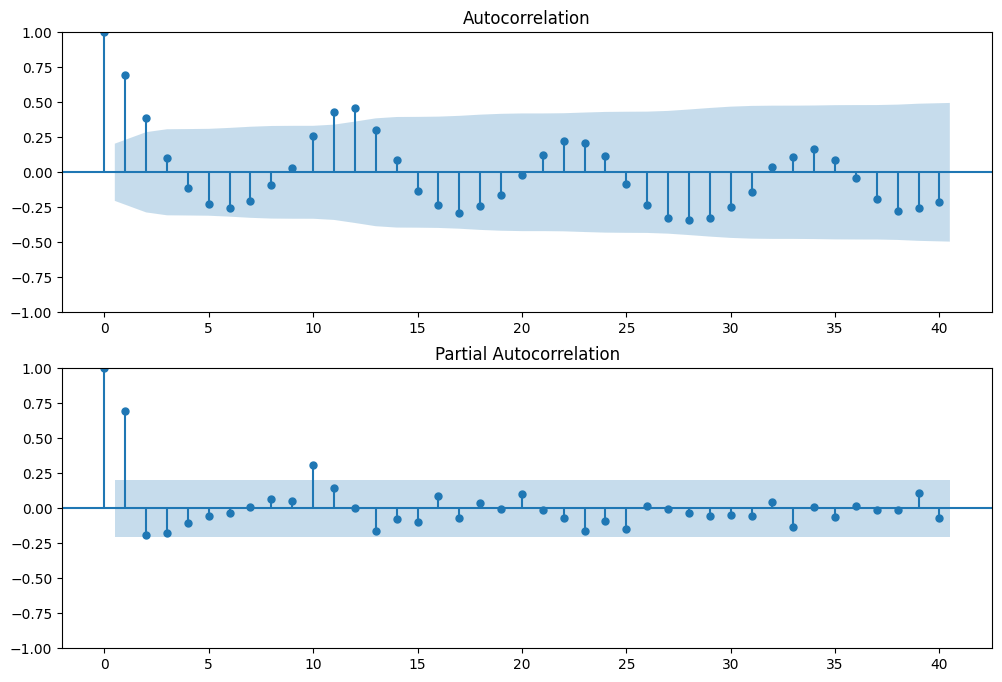

In [73]:
# Plot ACF and PACF charts to find optimal parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['RH_avg'].dropna(), lags=40, ax=ax[0])
plot_pacf(df['RH_avg'].dropna(), lags=40, ax=ax[1])
plt.show()

# Model 1

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
# Define the SARIMA model
# Here, p, d, q are determined from ACF and PACF charts
# P, D, Q, s are determined based on seasonality analysis
model = SARIMAX(df['RH_avg'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

In [76]:
# Make predictions for one year
forecast_steps = 24 # forecasting 24 month
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int(alpha=0.05)
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

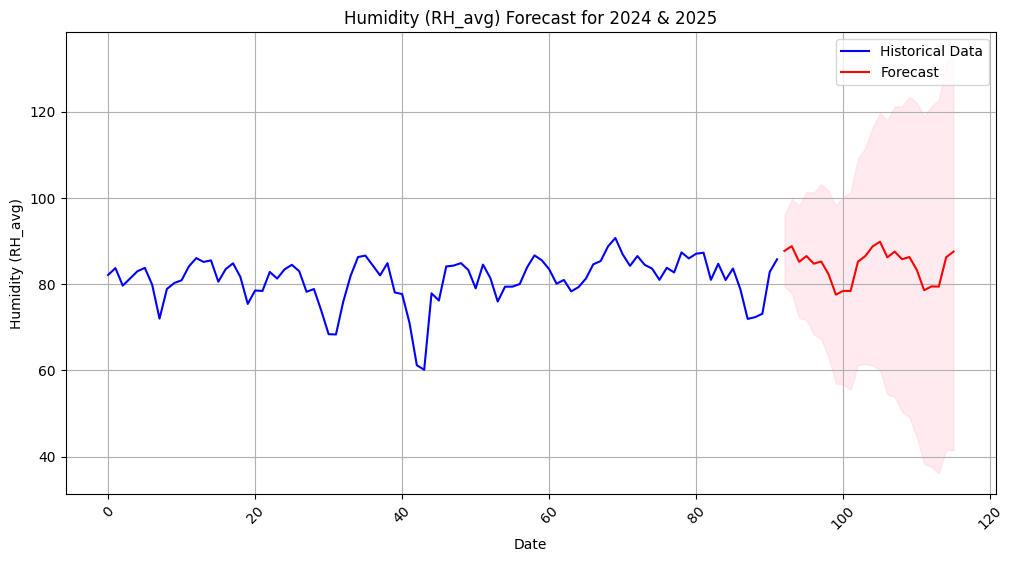

In [77]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RH_avg'], label='Historical Data', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Humidity (RH_avg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Humidity (RH_avg)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [78]:
forecast_df

,lower RH_avg,upper RH_avg,Forecast
92,79.457033,96.004398,87.730715
93,77.901010,99.732767,88.816889
94,72.154836,98.220826,85.187831
95,71.659529,101.362157,86.510843
96,68.285747,101.225941,84.755844
97,67.313605,103.200445,85.257025
98,63.006986,101.616236,82.311611
99,56.987675,98.139626,77.563651
100,56.673823,100.220258,78.447041
101,55.490047,101.305993,78.398020


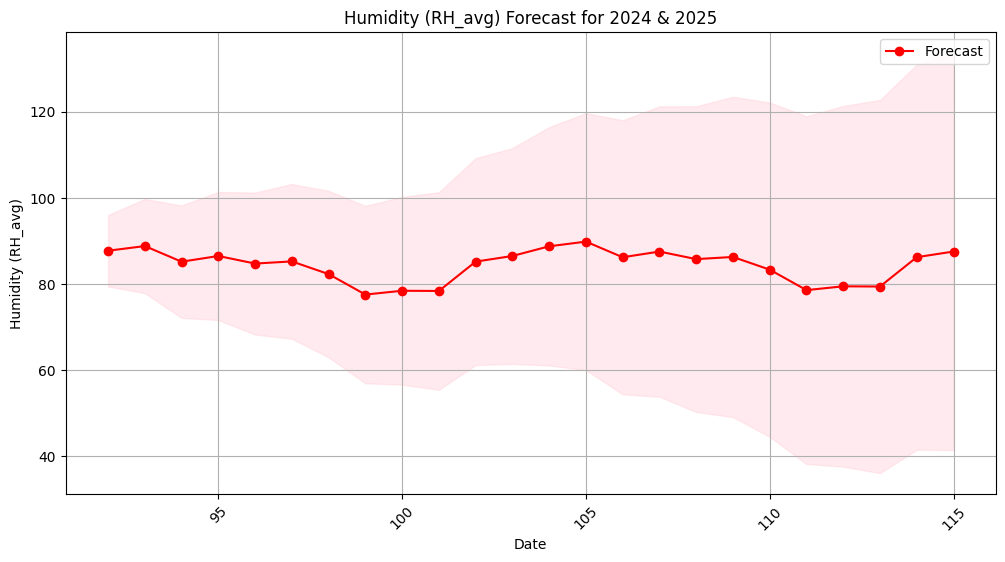

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot garis dengan titik-titik pada setiap titik
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r', marker='o')

# Mengisi area antara batas atas dan bawah prediksi
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)

# Judul dan label sumbu
plt.title('Humidity (RH_avg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Humidity (RH_avg)')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [80]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RH_avg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate RMSE (Root Mean Squared ERH_avgor)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared ERH_avgor (RMSE): {rmse}')

Root Mean Squared ERH_avgor (RMSE): 3.6899382345277836


In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RH_avg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Ensure the indices of forecast_df match actual_data
forecast_df.index = actual_data.index

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE (Mean Absolute Percentage Error) manually
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

mape = mean_absolute_percentage_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 3.6899382345277836
Mean Absolute Error (MAE): 3.1692603459891333
Mean Absolute Percentage Error (MAPE): 3.9473327725399527


In [82]:
std_dev = df['RH_avg'].std()
std_dev

5.36485878607753

# Model 2

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
# Define the SARIMA model
# Here, p, d, q are determined from ACF and PACF charts
# P, D, Q, s are determined based on seasonality analysis
model = SARIMAX(df['RH_avg'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [85]:
# Make predictions for one year
forecast_steps = 24 # forecasting 24 month
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int(alpha=0.05)
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

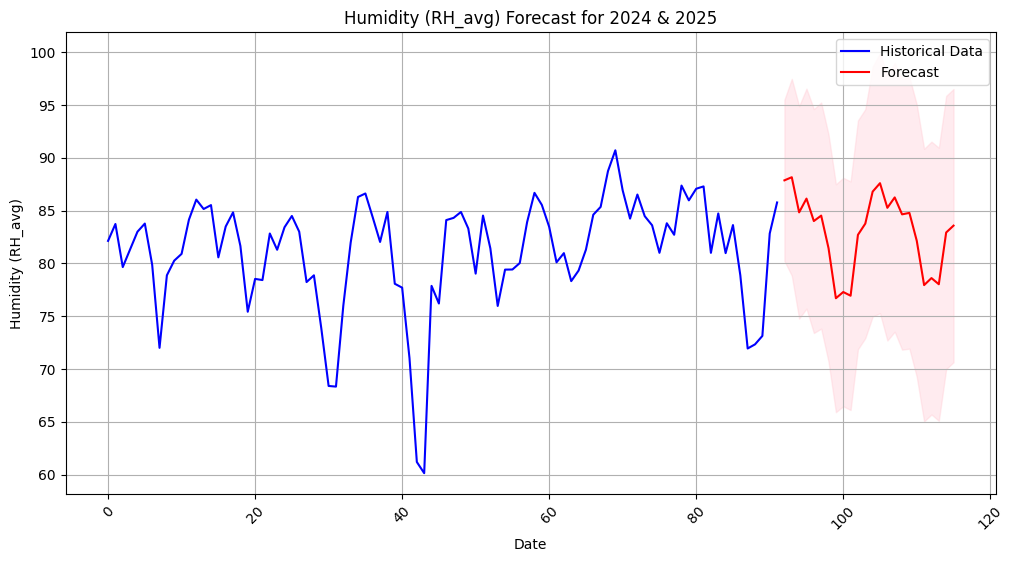

In [86]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RH_avg'], label='Historical Data', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Humidity (RH_avg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Humidity (RH_avg)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [87]:
forecast_df

,lower RH_avg,upper RH_avg,Forecast
92,80.231546,95.498547,87.865047
93,78.842603,97.477520,88.160061
94,74.777139,94.887708,84.832423
95,75.719052,96.550691,86.134872
96,73.405036,94.615272,84.010154
97,73.820284,95.229502,84.524893
98,70.676954,92.198431,81.437693
99,65.904909,87.492364,76.698636
100,66.473309,88.101078,77.287193
101,66.110736,87.764115,76.937426


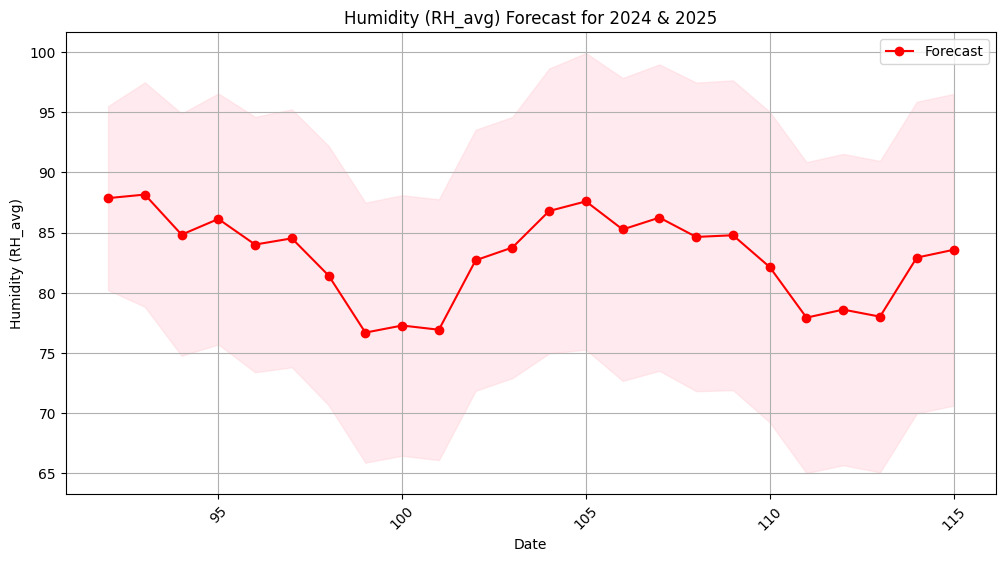

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot garis dengan titik-titik pada setiap titik
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r', marker='o')

# Mengisi area antara batas atas dan bawah prediksi
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)

# Judul dan label sumbu
plt.title('Humidity (RH_avg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Humidity (RH_avg)')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [89]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RH_avg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate RMSE (Root Mean Squared ERH_avgor)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared ERH_avgor (RMSE): {rmse}')

Root Mean Squared ERH_avgor (RMSE): 3.5205496819348747


In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['RH_avg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Ensure the indices of forecast_df match actual_data
forecast_df.index = actual_data.index

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE (Mean Absolute Percentage Error) manually
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

mape = mean_absolute_percentage_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 3.5205496819348747
Mean Absolute Error (MAE): 2.8964207690266197
Mean Absolute Percentage Error (MAPE): 3.589118414023588


In [91]:
std_dev = df['RH_avg'].std()
std_dev

5.36485878607753

# Tahap 4 (Temperature)

In [92]:
df = df_per_bulan

In [93]:
df['Tavg'] = df['Tavg'].replace(8888, '')
df

,Bulan,Tahun,tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,RR
0,1,2016,2016-01-16 00:00:00,22.94,31.15,26.66,82.13,4.68,160.97,1.68,329.45
1,2,2016,2016-02-15 00:00:00,22.72,30.68,26.63,83.73,4.59,201.72,1.97,338.36
2,3,2016,2016-03-16 00:00:00,23.07,31.87,27.33,79.65,4.87,114.52,1.97,288.19
3,4,2016,2016-04-15 12:00:00,23.23,32.00,27.81,81.33,4.50,199.67,1.63,351.66
4,5,2016,2016-05-16 00:00:00,23.49,32.60,27.66,83.00,4.16,156.77,1.29,375.33
...,...,...,...,...,...,...,...,...,...,...,...
87,8,2023,2023-08-16 00:00:00,22.73,33.68,28.45,71.94,6.94,177.74,2.97,148.91
88,9,2023,2023-09-15 12:00:00,22.33,33.42,27.91,72.33,5.87,163.33,2.53,114.72
89,10,2023,2023-10-16 00:00:00,22.14,34.17,28.63,73.13,4.62,184.06,1.76,90.21
90,11,2023,2023-11-15 12:00:00,23.42,33.06,27.46,82.83,4.07,247.33,1.30,265.50


In [94]:
# Konversi ke tipe numerik
df['Tavg'] = pd.to_numeric(df['Tavg'], errors='coerce')

# Cari nilai rata-rata dari kolom Tavg
avgTavg = df['Tavg'].mean()

# Isi nilai kosong dengan nilai rata-rata
df['Tavg'] = df['Tavg'].fillna(avgTavg)
df

,Bulan,Tahun,tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,RR
0,1,2016,2016-01-16 00:00:00,22.94,31.15,26.66,82.13,4.68,160.97,1.68,329.45
1,2,2016,2016-02-15 00:00:00,22.72,30.68,26.63,83.73,4.59,201.72,1.97,338.36
2,3,2016,2016-03-16 00:00:00,23.07,31.87,27.33,79.65,4.87,114.52,1.97,288.19
3,4,2016,2016-04-15 12:00:00,23.23,32.00,27.81,81.33,4.50,199.67,1.63,351.66
4,5,2016,2016-05-16 00:00:00,23.49,32.60,27.66,83.00,4.16,156.77,1.29,375.33
...,...,...,...,...,...,...,...,...,...,...,...
87,8,2023,2023-08-16 00:00:00,22.73,33.68,28.45,71.94,6.94,177.74,2.97,148.91
88,9,2023,2023-09-15 12:00:00,22.33,33.42,27.91,72.33,5.87,163.33,2.53,114.72
89,10,2023,2023-10-16 00:00:00,22.14,34.17,28.63,73.13,4.62,184.06,1.76,90.21
90,11,2023,2023-11-15 12:00:00,23.42,33.06,27.46,82.83,4.07,247.33,1.30,265.50


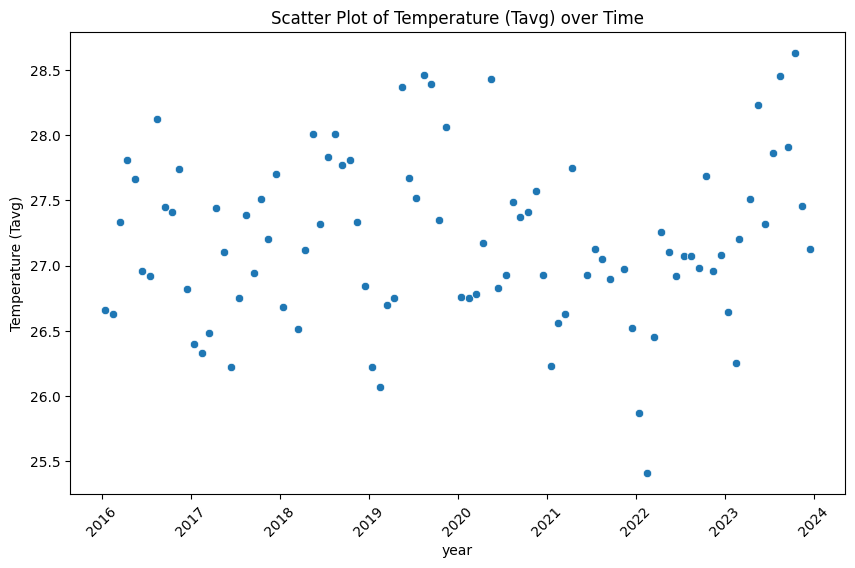

In [95]:
# Menampilkan scatter plot dari data Tavg dan tanggal curah hujan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tanggal', y='Tavg', data=df)
plt.title('Scatter Plot of Temperature (Tavg) over Time')
plt.xlabel('year')
plt.ylabel('Temperature (Tavg)')
plt.xticks(rotation=45)
plt.show()

In [96]:
df2 = df[["tanggal", "Tavg"]]
df2

,tanggal,Tavg
0,2016-01-16 00:00:00,26.66
1,2016-02-15 00:00:00,26.63
2,2016-03-16 00:00:00,27.33
3,2016-04-15 12:00:00,27.81
4,2016-05-16 00:00:00,27.66
...,...,...
87,2023-08-16 00:00:00,28.45
88,2023-09-15 12:00:00,27.91
89,2023-10-16 00:00:00,28.63
90,2023-11-15 12:00:00,27.46


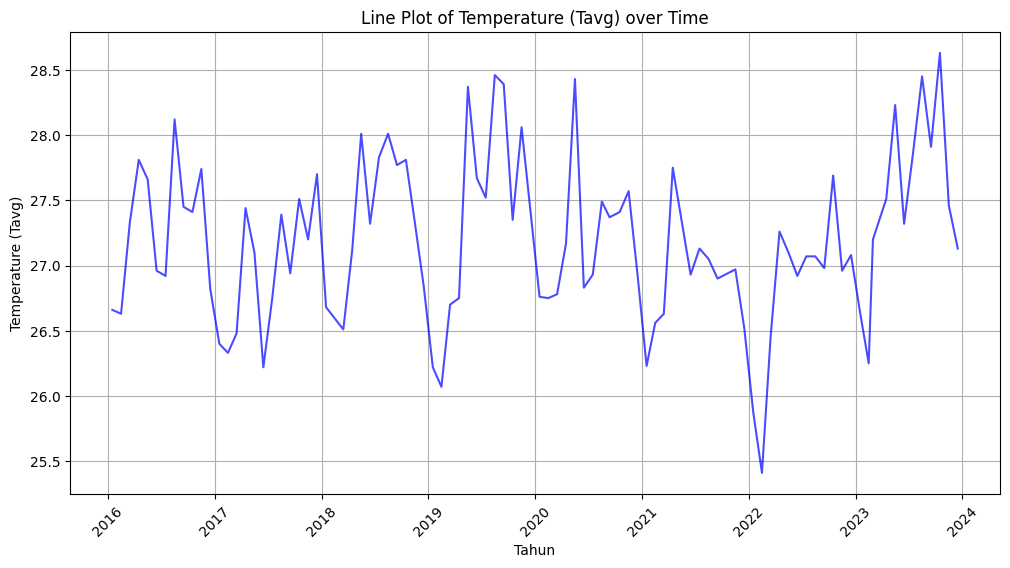

In [97]:
# Visualisasi hasil tahap 3 dengan line plot tanpa titik
plt.figure(figsize=(12, 6))
plt.plot(df2['tanggal'], df2['Tavg'], linestyle='-', color='b', alpha=0.7)
plt.title('Line Plot of Temperature (Tavg) over Time')
plt.xlabel('Tahun')
plt.ylabel('Temperature (Tavg)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# *Forecasting*

In [98]:
df = df2[["tanggal", "Tavg"]]
df

,tanggal,Tavg
0,2016-01-16 00:00:00,26.66
1,2016-02-15 00:00:00,26.63
2,2016-03-16 00:00:00,27.33
3,2016-04-15 12:00:00,27.81
4,2016-05-16 00:00:00,27.66
...,...,...
87,2023-08-16 00:00:00,28.45
88,2023-09-15 12:00:00,27.91
89,2023-10-16 00:00:00,28.63
90,2023-11-15 12:00:00,27.46


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import drive

In [100]:
# Stationarize the series
result = adfuller(df['Tavg'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.517475557067273
p-value: 1.9105756327402573e-06


stasionerkan data karna lebih dari 0.05

In [101]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [102]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [103]:
adfuller_test(df2['Tavg'])

ADF Test Statistic : -5.517475557067273
p-value : 1.9105756327402573e-06
#Lags Used : 0
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [104]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

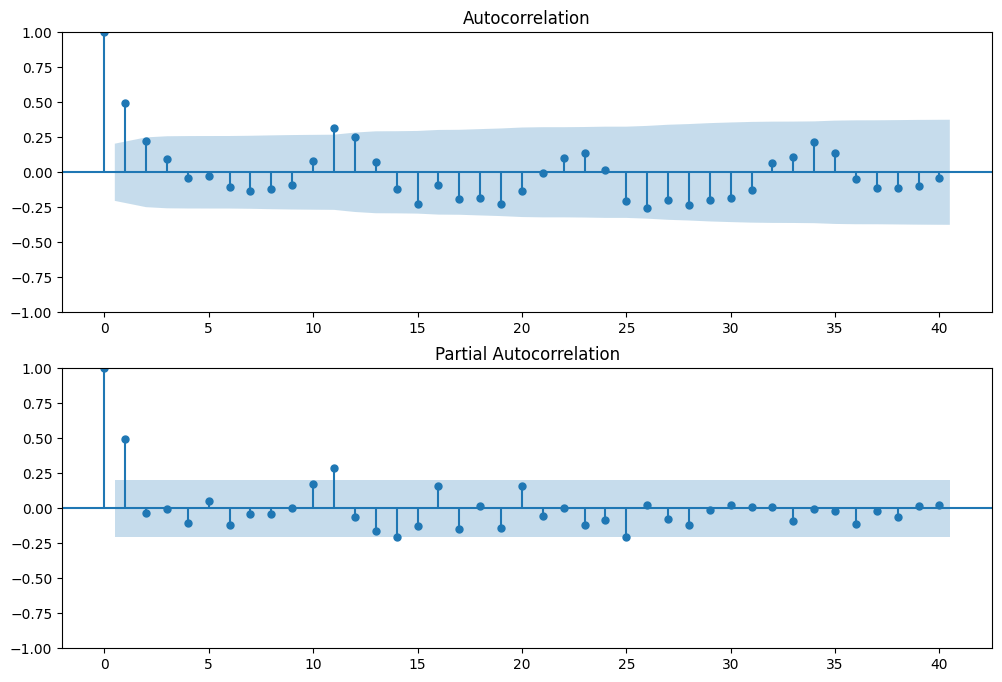

In [105]:
# Plot ACF and PACF charts to find optimal parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Tavg'].dropna(), lags=40, ax=ax[0])
plot_pacf(df['Tavg'].dropna(), lags=40, ax=ax[1])
plt.show()

# Model 1 Suhu

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [107]:
# Define the SARIMA model
# Here, p, d, q are determined from ACF and PACF charts
# P, D, Q, s are determined based on seasonality analysis
model = SARIMAX(df['Tavg'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

In [108]:
# Make predictions for one year
forecast_steps = 24 # forecasting 24 month
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int(alpha=0.05)
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

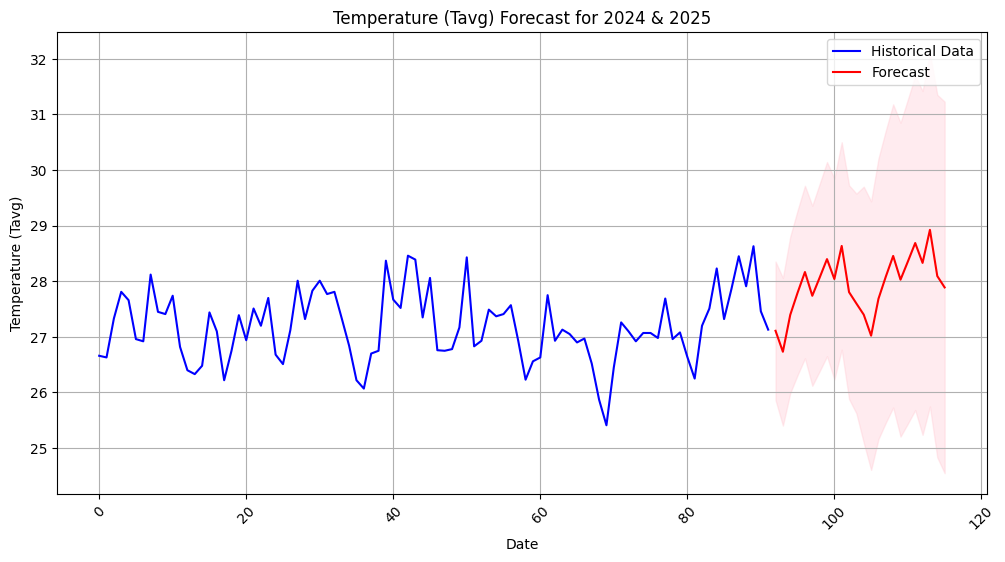

In [109]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Tavg'], label='Historical Data', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Temperature (Tavg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (Tavg)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [110]:
forecast_df

,lower Tavg,upper Tavg,Forecast
92,25.864086,28.354549,27.109318
93,25.404080,28.060905,26.732493
94,25.988923,28.802289,27.395606
95,26.313358,29.275003,27.794181
96,26.614579,29.717424,28.166001
97,26.120202,29.358096,27.739149
98,26.381794,29.749325,28.065560
99,26.652181,30.144540,28.398360
100,26.234415,29.847291,28.040853
101,26.770774,30.500276,28.635525


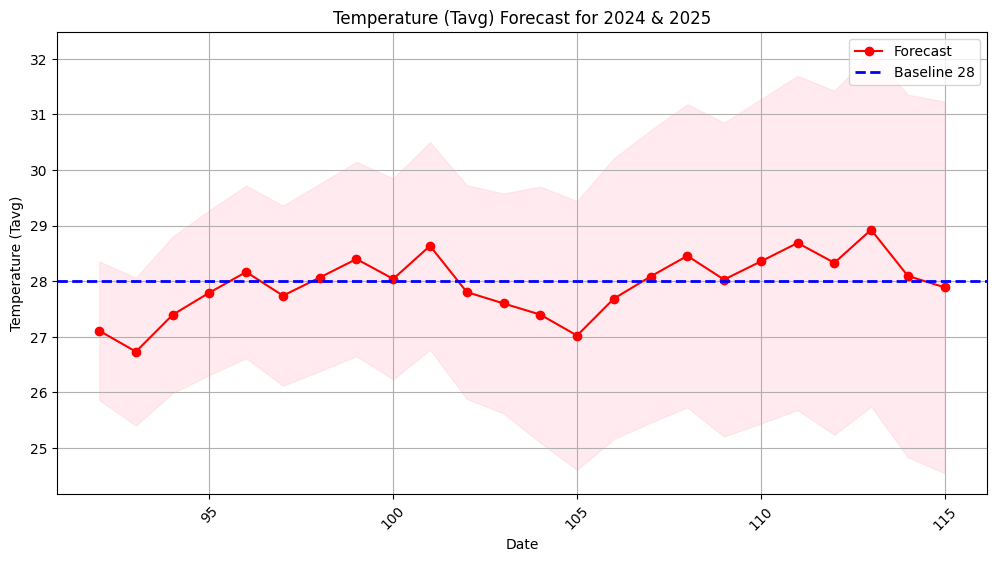

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot garis dengan titik-titik pada setiap titik
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r', marker='o')

# Mengisi area antara batas atas dan bawah prediksi
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)

# Menambahkan garis horizontal biru dengan nilai 200
plt.axhline(y=28, color='b', linestyle='--', linewidth=2, label='Baseline 28')

# Judul dan label sumbu
plt.title('Temperature (Tavg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (Tavg)')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [112]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['Tavg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate RMSE (Root Mean Squared ETavgor)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared ETavgor (RMSE): {rmse}')

Root Mean Squared ETavgor (RMSE): 0.8129899169051903


In [113]:
# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['Tavg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_data, forecast_df['Forecast'])
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.6609526049895081


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['Tavg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Ensure the indices of forecast_df match actual_data
forecast_df.index = actual_data.index

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE (Mean Absolute Percentage Error) manually
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

mape = mean_absolute_percentage_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 0.8129899169051903
Mean Absolute Error (MAE): 0.7494250747603827
Mean Absolute Percentage Error (MAPE): 2.783166554411245


In [115]:
std_dev = df['Tavg'].std()
std_dev

0.6304337232473761

# Model 2 Suhu

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
# Define the SARIMA model
# Here, p, d, q are determined from ACF and PACF charts
# P, D, Q, s are determined based on seasonality analysis
model = SARIMAX(df['Tavg'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [118]:
# Make predictions for one year
forecast_steps = 24 # forecasting 24 month
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int(alpha=0.05)
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

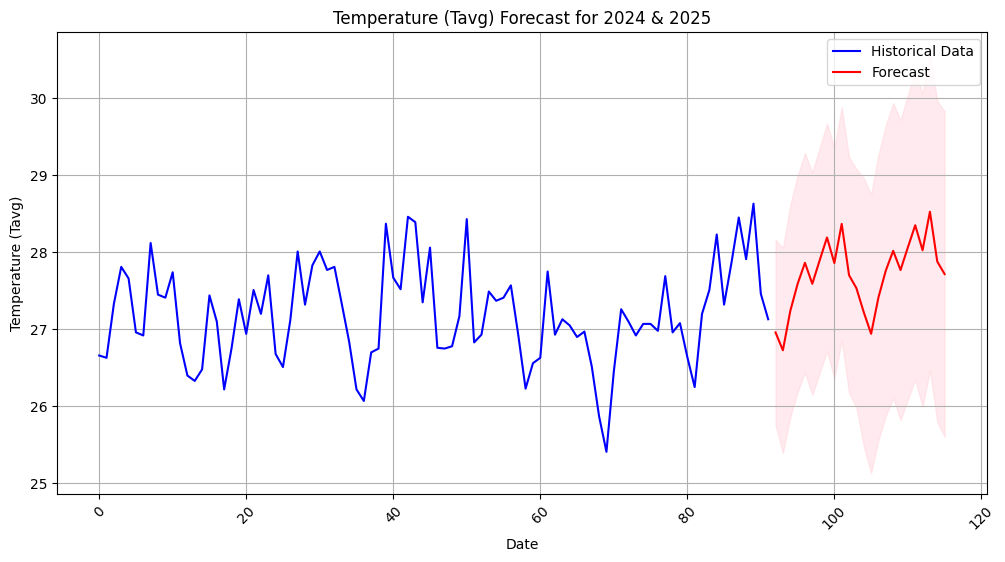

In [119]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Tavg'], label='Historical Data', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Temperature (Tavg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (Tavg)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [120]:
forecast_df

,lower Tavg,upper Tavg,Forecast
92,25.755673,28.163580,26.959627
93,25.395571,28.059232,26.727401
94,25.858761,28.611554,27.235158
95,26.185818,28.990972,27.588395
96,26.439630,29.286390,27.863010
97,26.147820,29.032454,27.590137
98,26.433651,29.354613,27.894132
99,26.713411,29.669894,28.191652
100,26.363875,29.355333,27.859604
101,26.854748,29.880734,28.367741


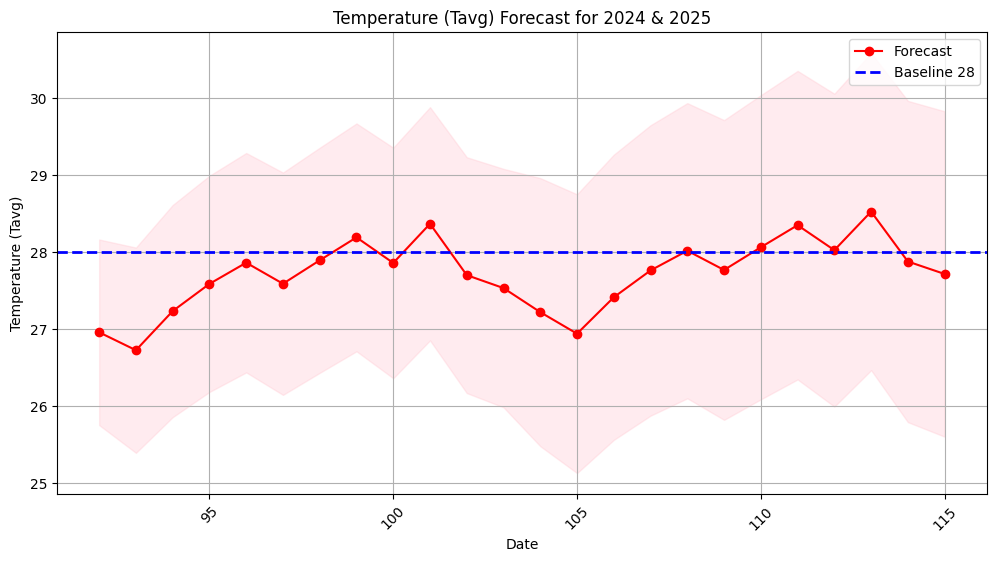

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot garis dengan titik-titik pada setiap titik
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='r', marker='o')

# Mengisi area antara batas atas dan bawah prediksi
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)

# Menambahkan garis horizontal biru dengan nilai 200
plt.axhline(y=28, color='b', linestyle='--', linewidth=2, label='Baseline 28')

# Judul dan label sumbu
plt.title('Temperature (Tavg) Forecast for 2024 & 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (Tavg)')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


In [122]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['Tavg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate RMSE (Root Mean Squared ETavgor)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared ETavgor (RMSE): {rmse}')

Root Mean Squared ETavgor (RMSE): 0.6573598400693789


In [123]:
# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['Tavg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_data, forecast_df['Forecast'])
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.4321219593360393


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace with actual data
actual_data = df['Tavg'][-forecast_steps:]  # Example: taking the last `forecast_steps` of actual data

# Ensure the indices of forecast_df match actual_data
forecast_df.index = actual_data.index

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_data, forecast_df['Forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE (Mean Absolute Percentage Error) manually
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

mape = mean_absolute_percentage_error(actual_data, forecast_df['Forecast'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 0.6573598400693789
Mean Absolute Error (MAE): 0.5658403552667665
Mean Absolute Percentage Error (MAPE): 2.1106546406824505


In [125]:
std_dev = df['Tavg'].std()
std_dev

0.6304337232473761